Loading Covertype dataset...


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3036.0    76.0   29.0                             256.0   
1         2967.0   327.0   17.0                             283.0   
2         2979.0    18.0   18.0                             708.0   
3         3160.0   301.0   17.0                             277.0   
4         3004.0   342.0   12.0                             391.0   
...          ...     ...    ...                               ...   
99995     2724.0   105.0    3.0                             234.0   
99996     3029.0   125.0   15.0                             216.0   
99997     2779.0    45.0   16.0                              90.0   
99998     3142.0    78.0    7.0                              60.0   
99999     3212.0   304.0    9.0                              67.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               115.0                           2148.0   
1                                51.0                           1906.0   
2                               160.0                           1355.0   
3                                84.0                           2918.0   
4                                72.0                           3185.0   
...                               ...                              ...   
99995                            26.0                           2081.0   
99996                            30.0                           5147.0   
99997                            20.0                           1924.0   
99998                             3.0                           2976.0   
99999                             9.0                           4674.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              241.0           173.0           42.0   
1              176.0           218.0          181.0   
2              204.0           201.0          129.0   
3              170.0           230.0          200.0   
4              196.0           222.0          165.0   
...              ...             ...            ...   
99995          224.0           236.0          147.0   
99996          244.0           228.0          108.0   
99997          223.0           203.0          110.0   
99998          229.0           228.0          132.0   
99999          196.0           236.0          179.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  2654.0  ...           0.0           1.0   
1                                  1667.0  ...           0.0           0.0   
2                                  2642.0  ...           0.0           1.0   
3                                  1165.0  ...           1.0           0.0   
4                                  1057.0  ...           0.0           0.0   
...                                   ...  ...           ...           ...   
99995                              6199.0  ...           0.0           0.0   
99996                              3217.0  ...           0.0           0.0   
99997                              2190.0  ...           0.0           0.0   
99998                              3467.0  ...           0.0           0.0   
99999                               420.0  ...           0.0           0.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

Dataset shape: (300, 10), Target shape: (300,)


Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2278.0    80.0   20.0                               0.0   
1       2350.0   134.0   25.0                             391.0   
2       2191.0   190.0   18.0                               0.0   
3       2203.0   155.0    4.0                               0.0   
4       2386.0    85.0   18.0                             309.0   
..         ...     ...    ...                               ...   
295     3424.0    68.0    5.0                             242.0   
296     3439.0   338.0   15.0                             582.0   
297     3414.0   311.0   10.0                             313.0   
298     3269.0   113.0   13.0                             576.0   
299     3385.0     7.0   11.0                             323.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0.0                           1044.0   
1                              56.0                           1168.0   
2                               0.0                            841.0   
3                               0.0                           1296.0   
4                             161.0                            484.0   
..                              ...                              ...   
295                             2.0                           1060.0   
296                            80.0                           1921.0   
297                            41.0                           2310.0   
298                           133.0                            518.0   
299                            76.0                           3572.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            242.0           201.0           80.0   
1            250.0           219.0           82.0   
2            218.0           251.0          161.0   
3            224.0           240.0          150.0   
4            243.0           206.0           86.0   
..             ...             ...            ...   
295          225.0           230.0          139.0   
296          186.0           217.0          170.0   
297          193.0           233.0          180.0   
298          242.0           226.0          110.0   
299          207.0           218.0          148.0   

     Horizontal_Distance_To_Fire_Points  target  
0                                1194.0       4  
1                                 700.0       4  
2                                 421.0       4  
3                                 680.0       4  
4                                1832.0       4  
..                                  ...     ...  
295                               920.0       7  
296                               469.0       7  
297                              2663.0       7  
298                              1012.0       7  
299                              3289.0       7  

[300 rows x 11 columns]

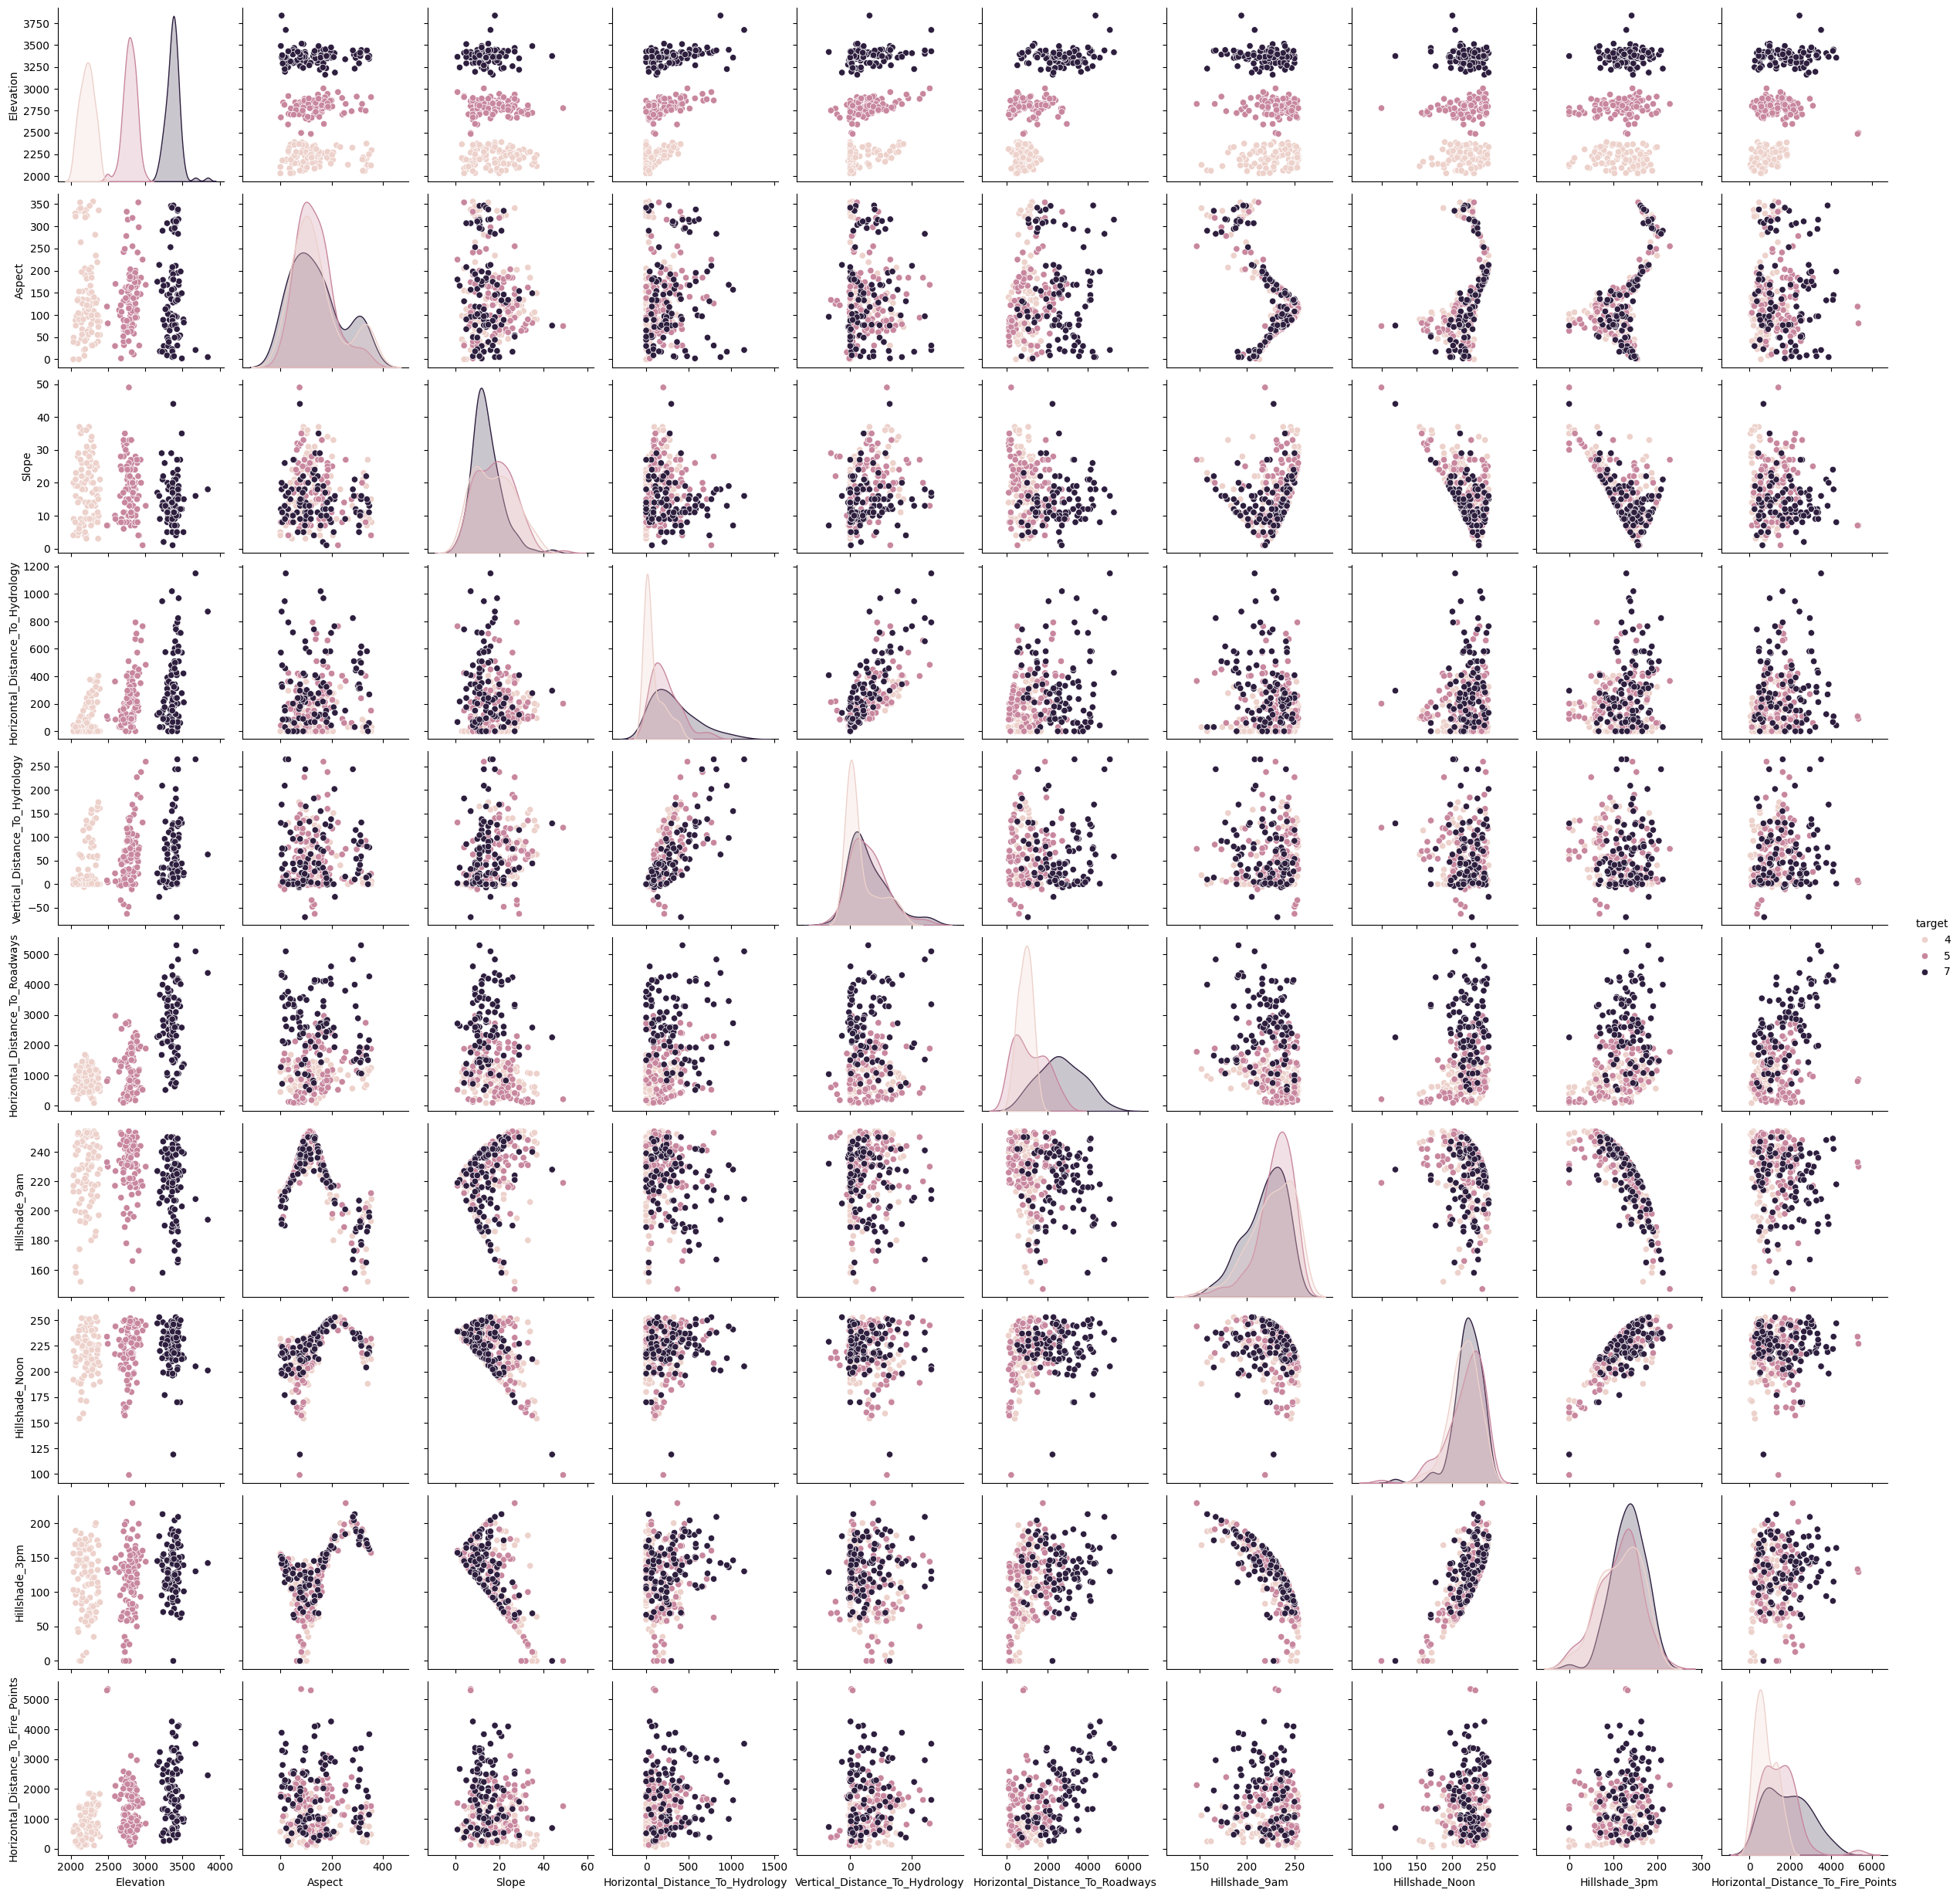

In [18]:
# --- Import libraries ---
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider, Dropdown

# --- Load Covertype dataset ---
print("Loading Covertype dataset...")

df_loaded = pd.read_pickle("data/covtype_sample.pkl.gz", compression="gzip")

display(df_loaded)

# species_range = np.arange(1, 8)
species_range = [4, 5, 7]

# keep only cover types 1,2,3 and sample exactly 100 rows for each
df_loaded = df_loaded[df_loaded["Cover_Type"].isin(species_range)]
df_sampled = pd.concat(
    [df_loaded[df_loaded["Cover_Type"] == c].sample(n=100, random_state=42) for c in species_range]
).reset_index(drop=True)
X_sample = df_sampled.iloc[:, :10].copy()
y_sample = df_sampled["Cover_Type"].copy()

print(f"Dataset shape: {X_sample.shape}, Target shape: {y_sample.shape}")

df_sample = X_sample.copy()
df_sample["target"] = y_sample

display(df_sample)

_ = sns.pairplot(df_sample, hue="target")



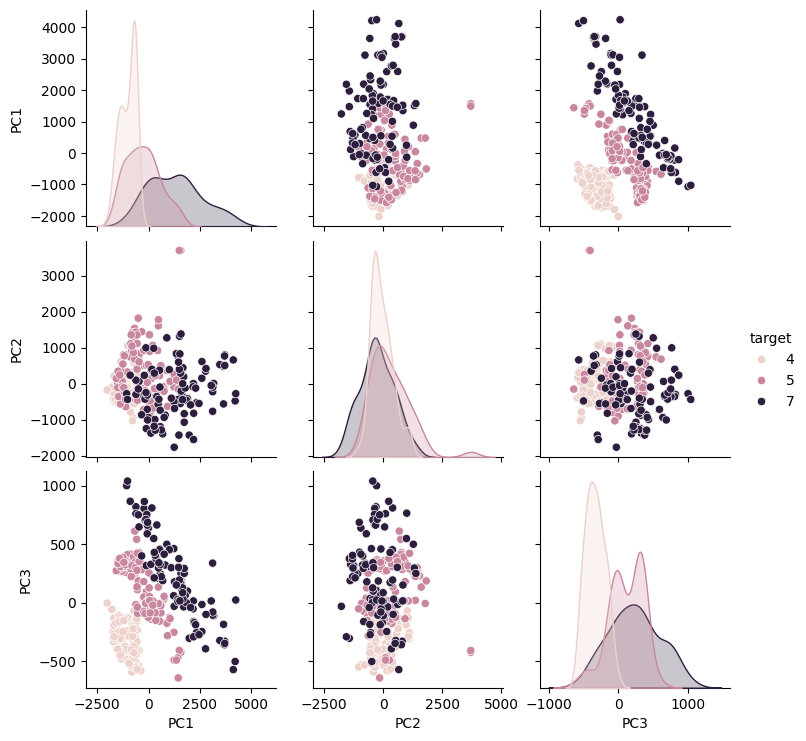

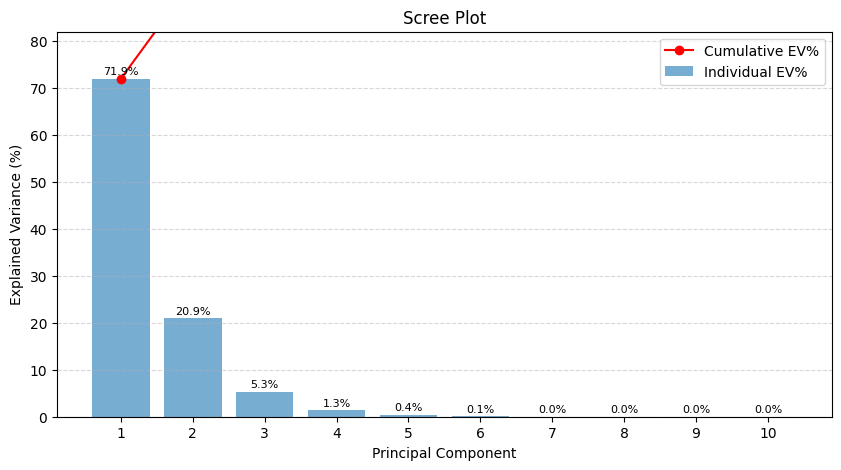

In [22]:
X_reduced = PCA(n_components=3).fit_transform(X_sample)

# Create a DataFrame with the PCA components and target names
pca_df = pd.DataFrame(data=X_reduced, columns=["PC1", "PC2", "PC3"])
pca_df["target"] = y_sample
# Plot the pair plot
_ = sns.pairplot(pca_df, hue="target")
plt.show()

# Scree plot: explained variance ratio for principal components
pca_full = PCA().fit(X_sample)
explained = pca_full.explained_variance_ratio_
components = np.arange(1, explained.size + 1)

plt.figure(figsize=(10,5))
plt.bar(components, explained * 100, alpha=0.6, label='Individual EV%')
plt.plot(components, np.cumsum(explained) * 100, marker='o', color='red', label='Cumulative EV%')
# annotate first few components to avoid clutter
for i, val in enumerate(explained[:15]):
    plt.text(components[i], val * 100 + 0.5, f"{val*100:.1f}%", ha='center', va='bottom', fontsize=8)
plt.xticks(components)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.ylim(0, max( (explained.max()*100) + 10, 20 ))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


Training Logistic Regression...

Classification report:

              precision    recall  f1-score   support

           4       0.96      1.00      0.98        25
           5       1.00      0.92      0.96        25
           7       0.96      1.00      0.98        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



/Users/stefanschweng/Documents/boku_university_ddai/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


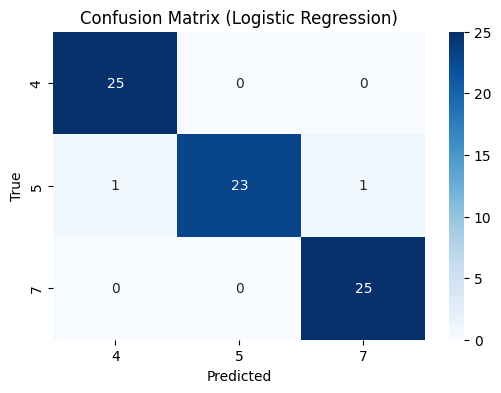

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X = X_sample
y = y_sample
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


# Build pipeline reusing the preprocessor defined earlier
lr_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(solver="liblinear", random_state=42))
])

# Train
print("Training Logistic Regression...")
lr_pipeline.fit(X_train, y_train)

# Predict & evaluate
y_pred = lr_pipeline.predict(X_test)
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=species_range)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_range, yticklabels=species_range)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# # ROC AUC (treat class '3' as positive)
# y_test_bin = (y_test == 3).astype(int)
# probas = lr_pipeline.predict_proba(X_test)
# pos_idx = list(lr_pipeline.named_steps["clf"].classes_).index(3)
# y_score = probas[:, pos_idx]

# fpr, tpr, _ = roc_curve(y_test_bin, y_score)
# auc_val = roc_auc_score(y_test_bin, y_score)

# plt.figure(figsize=(6,5))
# plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_val:.3f})", color="darkorange")
# plt.plot([0,1], [0,1], linestyle="--", color="gray")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve (Logistic Regression)")
# plt.legend(loc="lower right")
# plt.grid(True)
# plt.show()

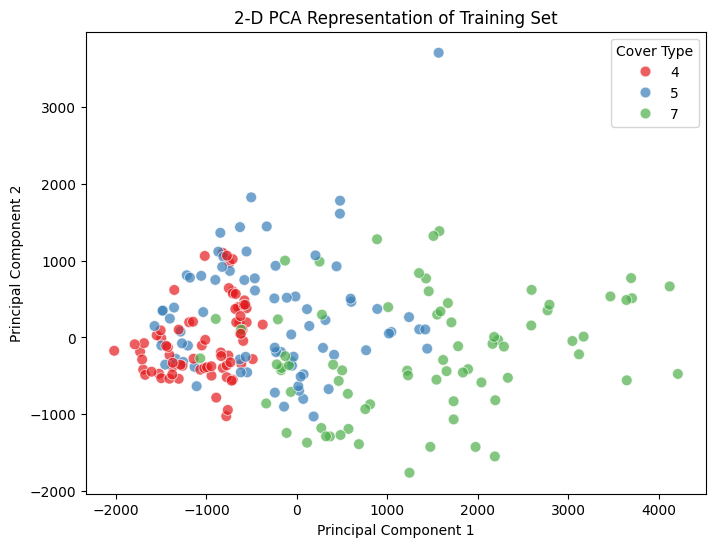

Classification report (LogReg on first 2 PCA components):

              precision    recall  f1-score   support

           4       0.66      0.84      0.74        25
           5       0.56      0.36      0.44        25
           7       0.70      0.76      0.73        25

    accuracy                           0.65        75
   macro avg       0.64      0.65      0.64        75
weighted avg       0.64      0.65      0.64        75



/Users/stefanschweng/Documents/boku_university_ddai/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


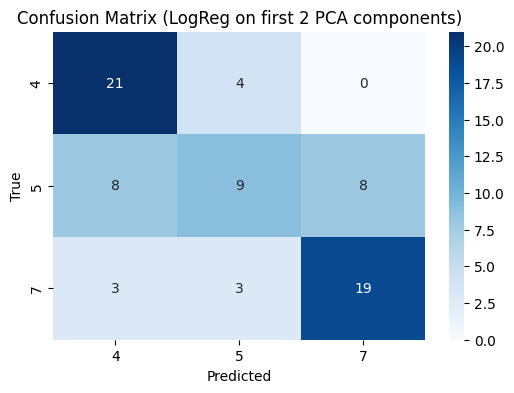

Test accuracy (2-PC PCA + LogisticRegression): 0.653


In [ ]:
import matplotlib.pyplot as plt

# Project train/test onto the first two components from the already-fitted pca_full
X_train_pca = pca_full.transform(X_train)[:, :2]
X_test_pca  = pca_full.transform(X_test)[:, :2]

# Plot the 2-D PCA representation of the train set
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="Set1", s=60, alpha=0.7)
plt.title("2-D PCA Representation of Training Set")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cover Type")
plt.show()

# Train logistic regression on the 2-D PCA representation
lr_pca = Pipeline([
    ("scale", StandardScaler()),
    ("clf", LogisticRegression(solver="liblinear", random_state=42))
])
lr_pca.fit(X_train_pca, y_train)

# Evaluate
y_pred_pca = lr_pca.predict(X_test_pca)
print("Classification report (LogReg on first 2 PCA components):\n")
print(classification_report(y_test, y_pred_pca))

cm_pca = confusion_matrix(y_test, y_pred_pca, labels=species_range)
plt.figure(figsize=(6,4))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", xticklabels=species_range, yticklabels=species_range)
plt.title("Confusion Matrix (LogReg on first 2 PCA components)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"Test accuracy (2-PC PCA + LogisticRegression): {lr_pca.score(X_test_pca, y_test):.3f}")

Explained variance ratio: [0.336801   0.24057712]


PC1       PC2
Elevation                           0.265989  0.426959
Aspect                              0.305254 -0.185385
Slope                              -0.345107  0.209097
Horizontal_Distance_To_Hydrology    0.194620  0.460612
Vertical_Distance_To_Hydrology      0.018239  0.464741
Horizontal_Distance_To_Roadways     0.298470  0.318521
Hillshade_9am                      -0.377863  0.142327
Hillshade_Noon                      0.401818 -0.194745
Hillshade_3pm                       0.498741 -0.216593
Horizontal_Distance_To_Fire_Points  0.191565  0.323911


Top features for PC1:


Hillshade_3pm                         0.498741
Hillshade_Noon                        0.401818
Hillshade_9am                         0.377863
Slope                                 0.345107
Aspect                                0.305254
Horizontal_Distance_To_Roadways       0.298470
Elevation                             0.265989
Horizontal_Distance_To_Hydrology      0.194620
Horizontal_Distance_To_Fire_Points    0.191565
Vertical_Distance_To_Hydrology        0.018239
Name: PC1, dtype: float64


Top features for PC2:


Vertical_Distance_To_Hydrology        0.464741
Horizontal_Distance_To_Hydrology      0.460612
Elevation                             0.426959
Horizontal_Distance_To_Fire_Points    0.323911
Horizontal_Distance_To_Roadways       0.318521
Hillshade_3pm                         0.216593
Slope                                 0.209097
Hillshade_Noon                        0.194745
Aspect                                0.185385
Hillshade_9am                         0.142327
Name: PC2, dtype: float64

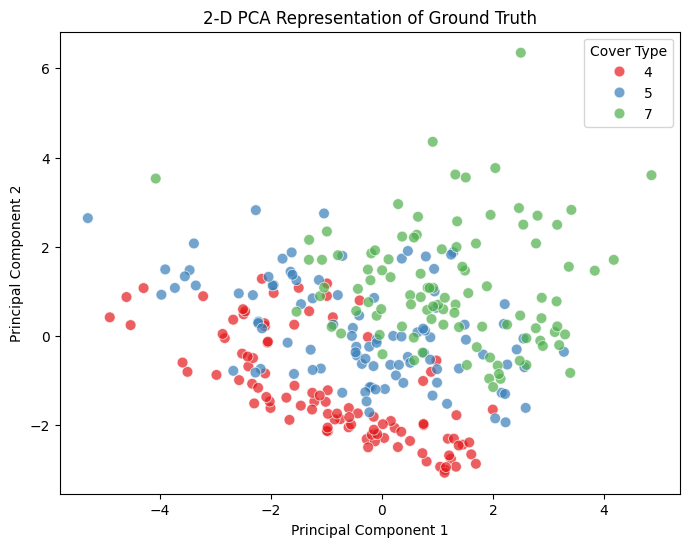

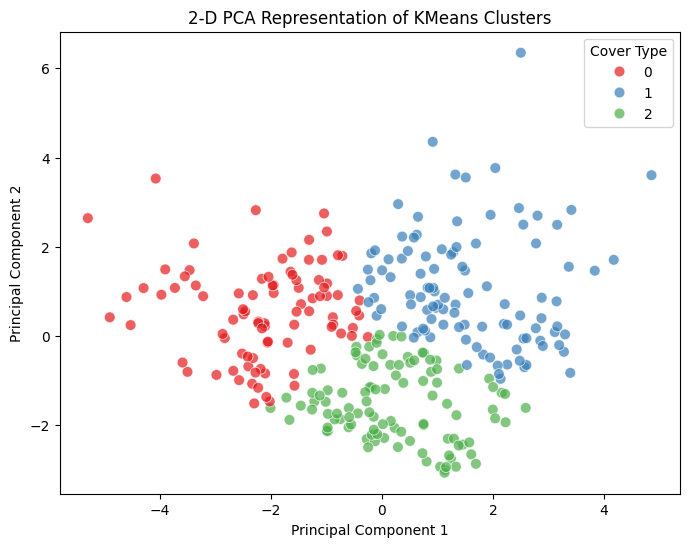

In [32]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Compute inertia for k = 1..10
# ks = range()
# inertias = []
# for k in ks:
km = KMeans(n_clusters=len(species_range), random_state=42, n_init=10)
y_pred_km = km.fit_predict(X_scaled)

X_reduced = PCA(n_components=2).fit_transform(X_scaled)

pca_km = PCA(n_components=2).fit(X_scaled)
loadings_km = pd.DataFrame(pca_km.components_.T, index=X_sample.columns, columns=["PC1", "PC2"])

print("Explained variance ratio:", pca_km.explained_variance_ratio_)
display(loadings_km)

for pc in loadings_km.columns:
    print(f"\nTop features for {pc}:")
    display(loadings_km[pc].abs().sort_values(ascending=False).head(10))

# Plot the 2-D PCA representation of the train set
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_sample, palette="Set1", s=60, alpha=0.7)
plt.title("2-D PCA Representation of Ground Truth")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cover Type")
plt.show()

# Plot the 2-D PCA representation of the train set
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_pred_km, palette="Set1", s=60, alpha=0.7)
plt.title("2-D PCA Representation of KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cover Type")
plt.show()

Explained variance ratio: [0.27899393 0.24081836]


PC1       PC2
feature_1  -0.010294  0.062873
feature_2   0.111838 -0.046139
feature_3  -0.023347 -0.189970
feature_4   0.069847 -0.004129
feature_5  -0.002319 -0.001243
feature_6   0.092879 -0.011412
feature_7   0.150822 -0.217293
feature_8   0.077837 -0.256869
feature_9   0.441066  0.758549
feature_10 -0.096353 -0.144985
feature_11  0.170747 -0.070982
feature_12 -0.157630 -0.008538
feature_13 -0.076475 -0.065923
feature_14  0.009646  0.003702
feature_15 -0.143874 -0.000074
feature_16 -0.109457  0.070804
feature_17  0.184881  0.099268
feature_18  0.006778 -0.002521
feature_19  0.782413 -0.394490
feature_20 -0.040998 -0.260958


Top features for PC1:


feature_19    0.782413
feature_9     0.441066
feature_17    0.184881
feature_11    0.170747
feature_12    0.157630
feature_7     0.150822
feature_15    0.143874
feature_2     0.111838
feature_16    0.109457
feature_10    0.096353
Name: PC1, dtype: float64


Top features for PC2:


feature_9     0.758549
feature_19    0.394490
feature_20    0.260958
feature_8     0.256869
feature_7     0.217293
feature_3     0.189970
feature_10    0.144985
feature_17    0.099268
feature_11    0.070982
feature_16    0.070804
Name: PC2, dtype: float64

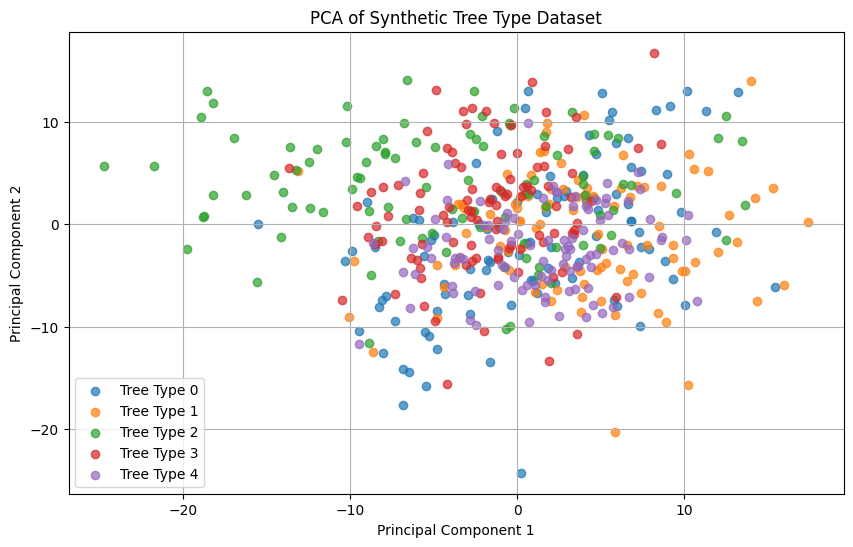

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate a synthetic high-dimensional dataset for tree type classification
# Let's assume we have 5 tree types and 20 features (e.g., leaf size, bark texture, height, etc.)

X, y = make_classification(
    n_samples=500,  # Number of samples
    n_features=20,  # Number of features
    n_informative=15,  # Number of informative features
    n_redundant=2,  # Number of redundant features
    n_classes=5,  # Number of tree types
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=42,
)

# Convert to a DataFrame for better visualization
feature_names = [f"feature_{i}" for i in range(1, 21)]
df = pd.DataFrame(X, columns=feature_names)
df["tree_type"] = y

# Apply PCA to reduce the dataset to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["tree_type"] = y

# PCA loading scores: features x components
loadings = pd.DataFrame(pca.components_.T, index=feature_names, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print("Explained variance ratio:", pca.explained_variance_ratio_)
display(loadings)

# Print top contributing features for each principal component
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    display(loadings[pc].abs().sort_values(ascending=False).head(10))

# Plot the PCA results
plt.figure(figsize=(10, 6))
for tree_type in np.unique(y):
    plt.scatter(
        df_pca[df_pca["tree_type"] == tree_type]["PC1"],
        df_pca[df_pca["tree_type"] == tree_type]["PC2"],
        label=f"Tree Type {tree_type}",
        alpha=0.7,
    )

plt.title("PCA of Synthetic Tree Type Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# df.head(), df_pca.head(), pca.explained_variance_ratio_

# Use kMeans to cluster the data points in the original feature space

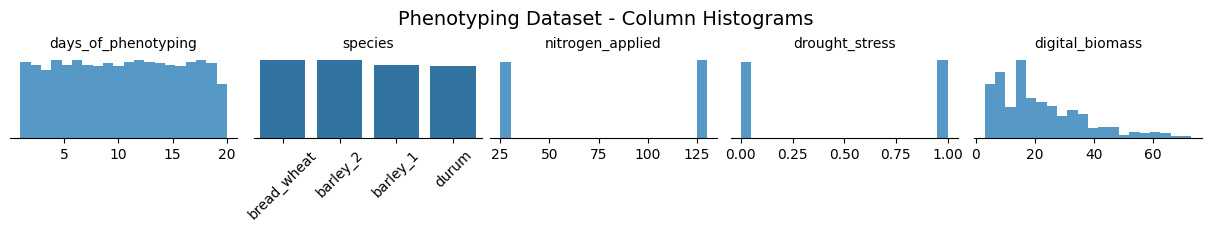

Sample Data (showing first 5 rows of dataset):


days_of_phenotyping   species  nitrogen_applied  drought_stress  \
0                    1  barley_1                25               0   
1                    2  barley_1                25               0   
2                    3  barley_1                25               0   
3                    4  barley_1                25               0   
4                    5  barley_1                25               0   

   digital_biomass  
0         5.498560  
1         5.540867  
2         5.703696  
3         5.717730  
4         5.708416

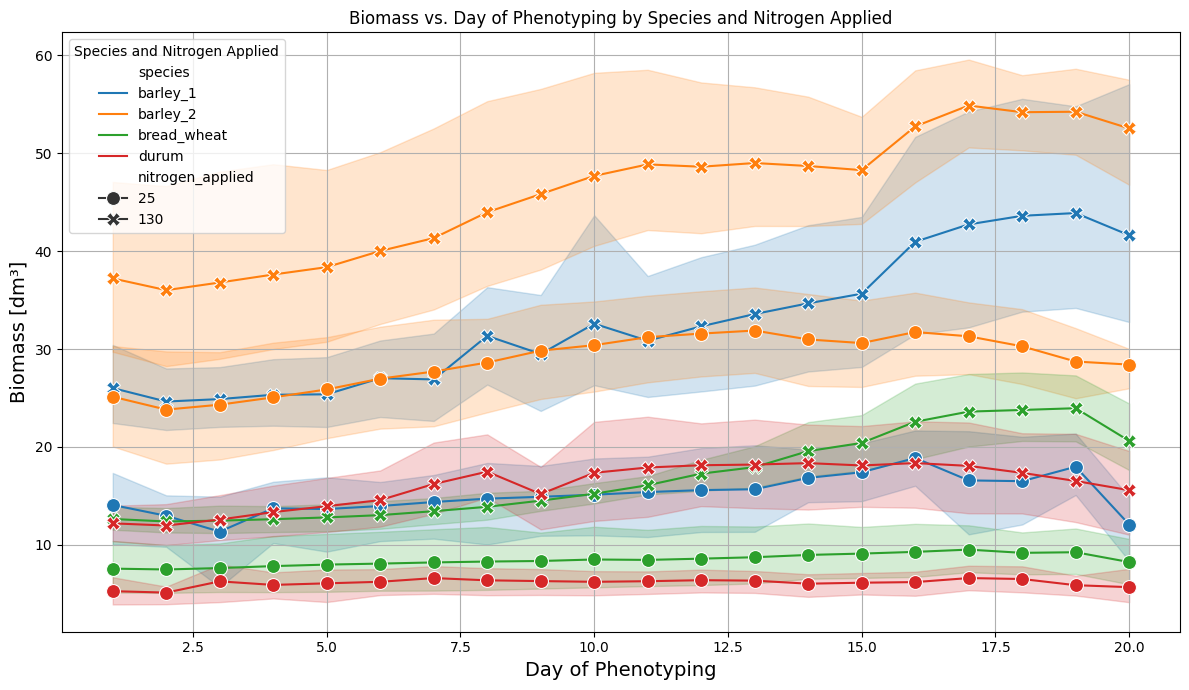

days_of_phenotyping   species  nitrogen_applied  drought_stress  rep  \
0                    1  barley_1                25               0    1   
1                    2  barley_1                25               0    1   
2                    3  barley_1                25               0    1   
3                    4  barley_1                25               0    1   
4                    5  barley_1                25               0    1   

   mean_plant_temperature  median_plant_temperature  std_plant_temperature  \
0               24.447787                 24.424066               0.902963   
1               24.451300                 24.475998               0.958762   
2               24.532748                 24.573843               0.989323   
3               24.434585                 24.451585               0.945582   
4               24.432615                 24.442659               0.945267   

   min_plant_temperature  max_plant_temperature  mean_side_area  \
0              21.906194              27.958105    29357.909527   
1              21.744783              27.867776    29545.947366   
2              21.557134              27.984342    29512.180481   
3              21.674772              27.894140    29254.245671   
4              21.747331              28.126928    28722.438850   

   mean_top_area  digital_biomass  
0    35079.04116         5.498560  
1    35168.96481         5.540867  
2    37351.67743         5.703696  
3    38200.53196         5.717730  
4    39499.22940         5.708416

In [ ]:
%run example_definitions/lecture_06/visualize_phenotyping_dataset.ipynb
df_loaded = load_and_visualize_phenotyping_dataset()

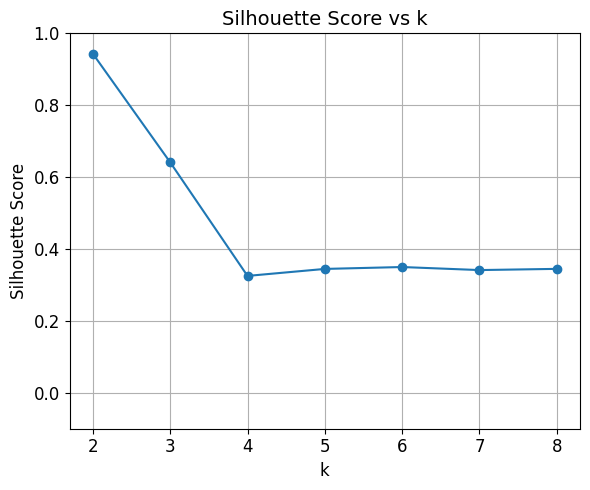

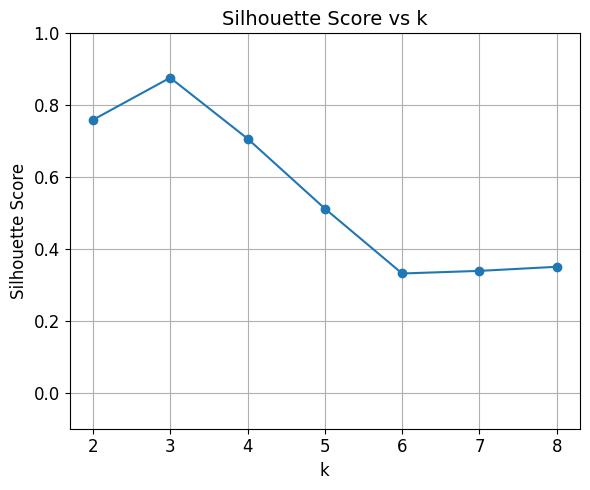

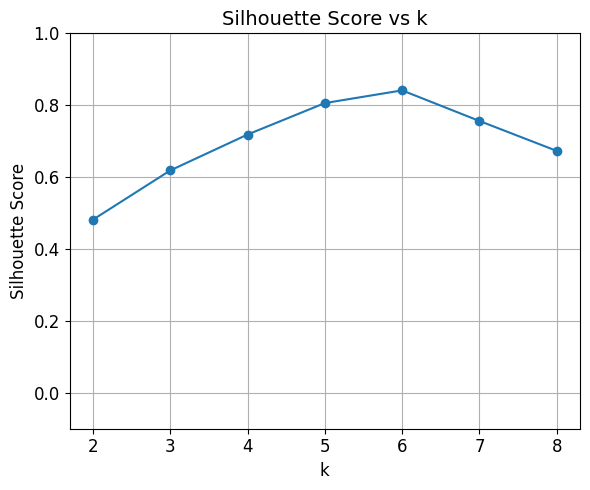

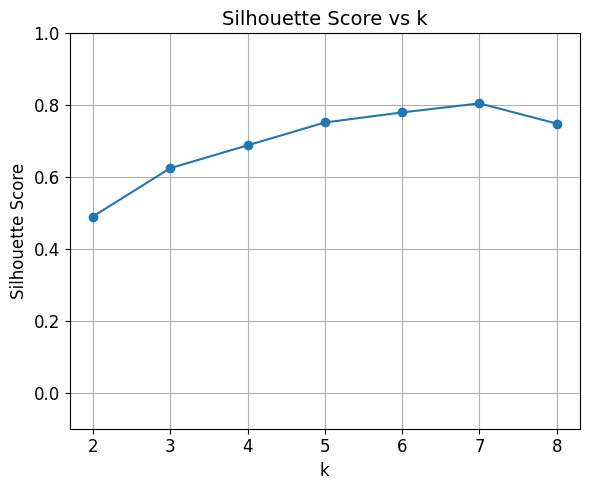

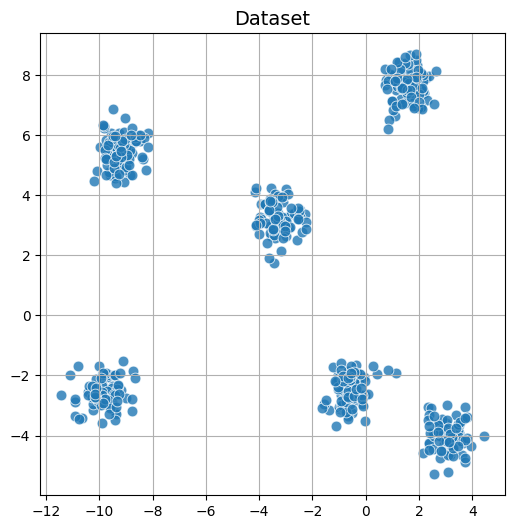

In [72]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a synthetic 2D clustering dataset
ks = list(range(1, 9))
sil_scores = {}  # int: [float]
cluster_numbers = [2, 3, 6, 7]

# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# axes = axes.ravel()

X2d_6 = []

for cluster_number in cluster_numbers:
    X2d, y2d = make_blobs(n_samples=500, centers=cluster_number, cluster_std=0.5, n_features=2, random_state=767)

    if cluster_number == 6:
        X2d_6 = X2d.copy()

    scores = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(X2d)
        scores.append(silhouette_score(X2d, km.labels_) if k > 1 else np.nan)
    sil_scores[cluster_number] = scores

# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# axes = axes.ravel()
    plt.figure(figsize=(6, 5))
    plt.plot(ks[1:], scores[1:], '-o')
    plt.xlabel('k', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.title(f'Silhouette Score vs k', fontsize=14)
    plt.xticks(ks[1:], fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(-0.1, 1.0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# hide any unused subplots (if cluster_numbers < 4)
# for ax in axes[len(cluster_numbers):]:
#     ax.set_visible(False)



# Plot X2d_6
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X2d_6[:, 0], y=X2d_6[:, 1], s=60, alpha=0.8)
plt.title('Dataset', fontsize=14)
plt.grid(True)
plt.show()

# X2d, y2d = make_blobs(n_samples=500, centers=6, cluster_std=0.73, n_features=2, random_state=767)

# for k in ks:
#     km = KMeans(n_clusters=k, random_state=42, n_init=10)
#     km.fit(X2d)
#     sil_scores.append(silhouette_score(X2d, km.labels_) if k > 1 else np.nan)

# Plot elbow (inertia) and silhouette


# plt.subplot(1, 2, 1)
# plt.plot(ks, inertias, '-o')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Plot (Inertia vs k)')
# plt.xticks(ks)
# plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.plot(ks[1:], sil_scores[1:], '-o')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs k')
# plt.xticks(ks[1:])
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# # Pick best k by max silhouette (k>=2)
# best_k = ks[int(np.nanargmax(sil_scores))]
# print(f"Selected k (max silhouette score): {best_k}")

# # Fit final KMeans and visualize clusters with centers
# km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
# labels_final = km_final.fit_predict(X2d)
# centers = km_final.cluster_centers_

# plt.figure(figsize=(6, 6))
# sns.scatterplot(x=X2d[:, 0], y=X2d[:, 1], hue=labels_final, palette="tab10", s=60, alpha=0.8, legend='full')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='centers')
# plt.title(f'KMeans clustering (k={best_k})')
# plt.legend()
# plt.grid(True)
# plt.show()

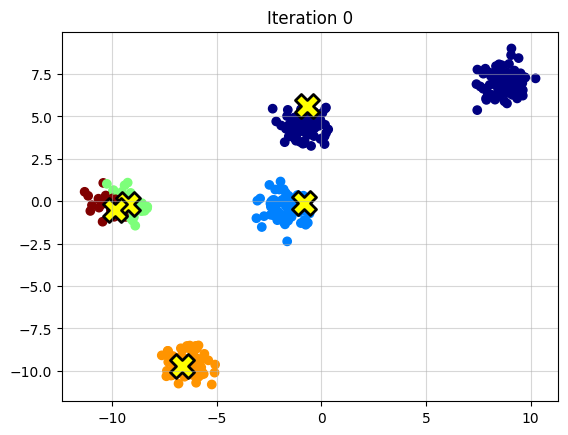

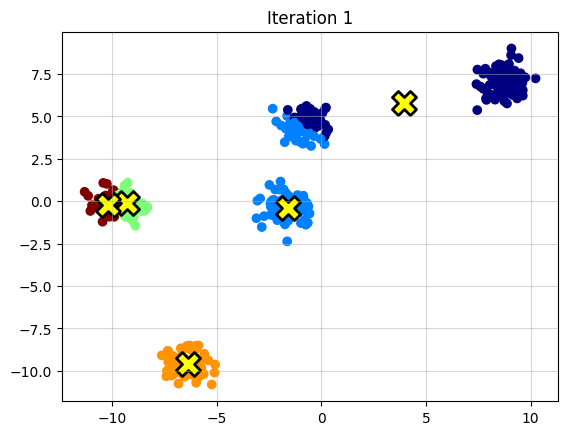

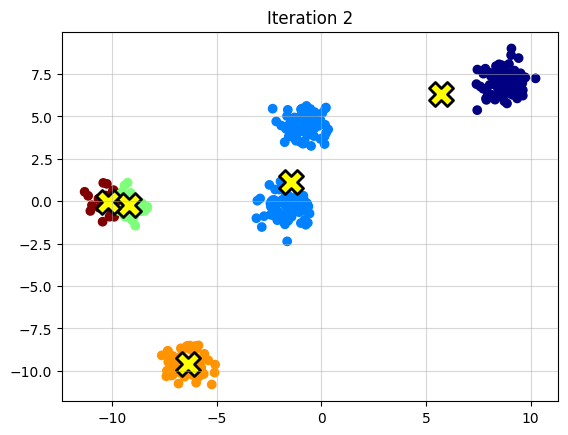

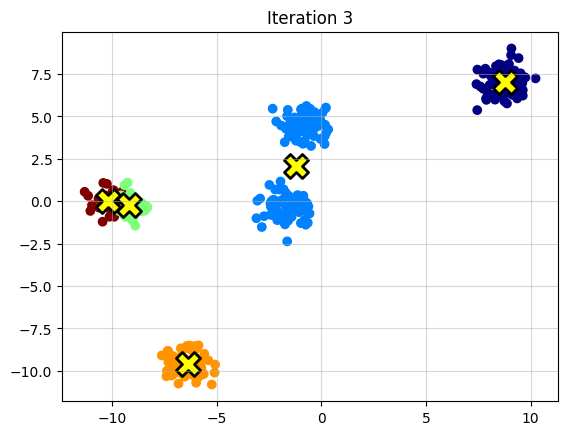

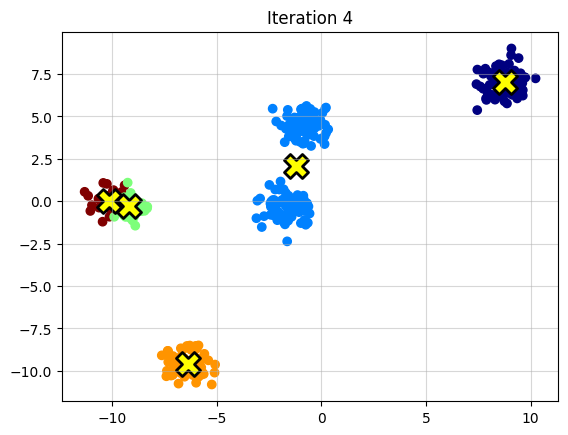

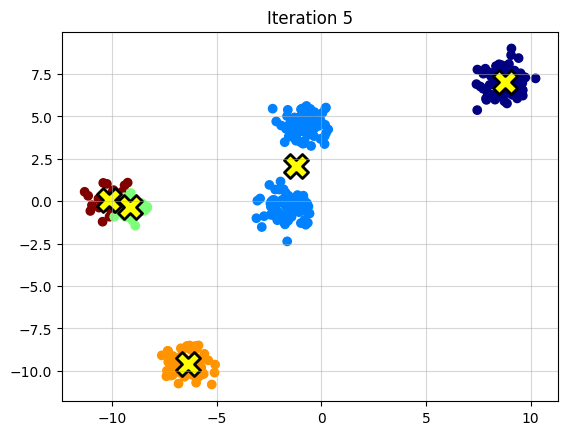

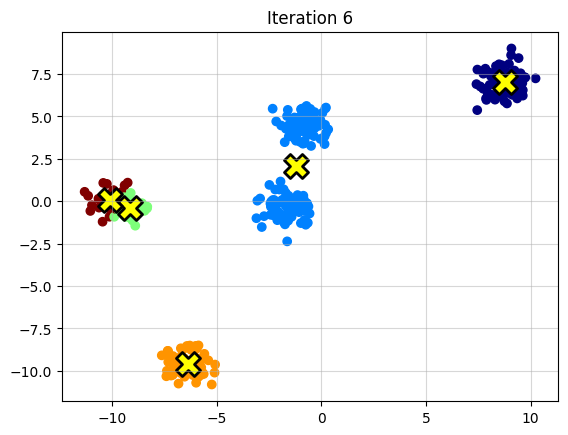

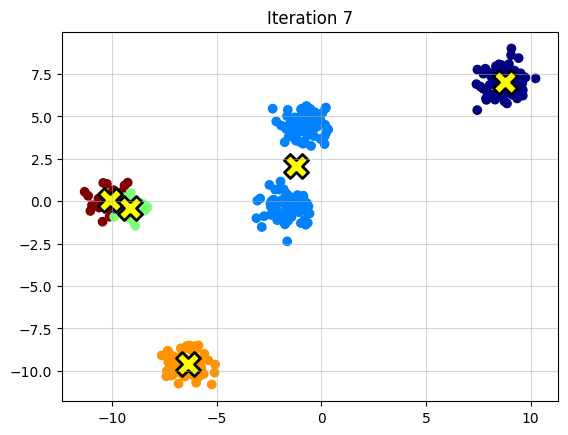

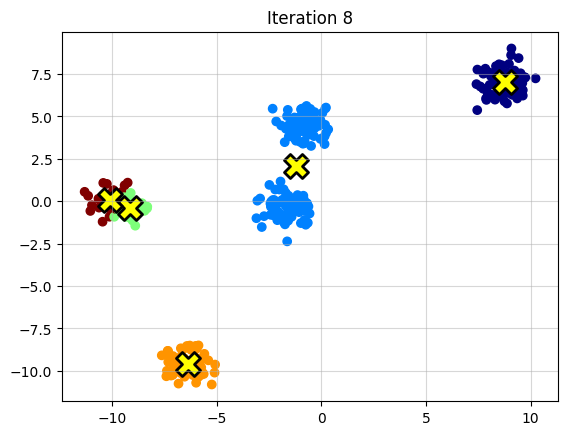

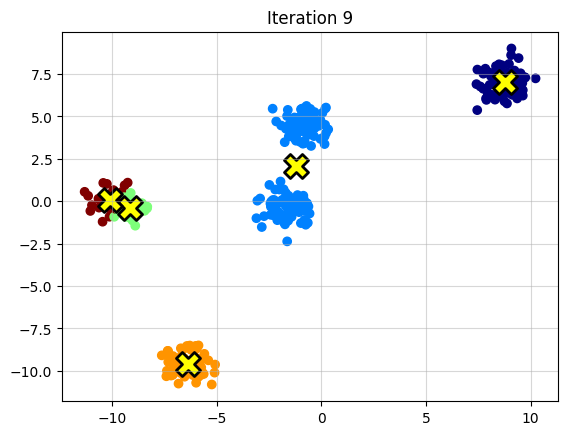

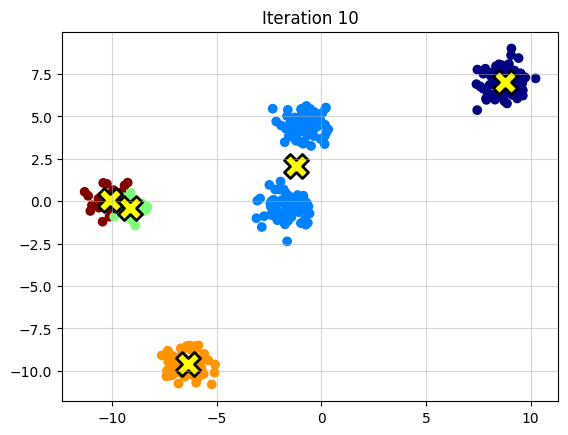

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate dataset
X, y = make_blobs(n_samples=400, centers=5, cluster_std=0.6, random_state=11)

k = 5
max_iter = 10
rng = np.random.default_rng(42)

# Initialize centroids
initial_indices = rng.choice(len(X), size=k, replace=False)
centroids = X[initial_indices]

def plot_iteration(X, centroids, labels, iteration):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', alpha=1)
    # Bold black centroids
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        marker='X', s=300, edgecolors='black', linewidths=2, c='yellow'
    )
    plt.title(f"Iteration {iteration}")
    plt.grid(alpha=0.5)
    plt.show()

# First label assignment
labels = np.argmin(np.linalg.norm(X[:, None] - centroids[None, :], axis=2), axis=1)
plot_iteration(X, centroids, labels, 0)

for it in range(1, max_iter + 1):
    new_centroids = np.vstack([X[labels == i].mean(axis=0) for i in range(k)])
    labels = np.argmin(np.linalg.norm(X[:, None] - new_centroids[None, :], axis=2), axis=1)
    centroids = new_centroids
    plot_iteration(X, centroids, labels, it)
